# Project: Wrangling and Analysis of Data

## Analyzing Twitter's WeRateDogs Tweets Dataset

In [1]:
#importing libraries
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Data Gathering

1. Loading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#using the requests library to get contents of a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#writing the contents of the url into a tsv file : 'image-predictions.tsv'
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
#Loading the 'image-predictions.tsv' into python with pandas
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
''' import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) '''

' import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.t

In [10]:
#loading each line of the 'tweet-json.txt' file into a python as a list of dictionaries
with open('tweet-json.txt','r',encoding='utf-8') as file:
    dog_dics_list = []
    for line in file:
        parse_into_json = json.loads(line)
        dog_dics_list.append(parse_into_json)

In [11]:
#checking the number of dictionaries in the list
n = len(dog_dics_list)
n

2354

In [9]:
#passing the 'tweet_id','favorites_count/likes' and 'retweet_count' into a new dataframe
idlist = []
likelist = []
retweetlist = []
for info in dog_dics_list:
    #print(type(info['user']))
    i_d = info['id']
    likes = info['favorite_count']
    retweets = info['retweet_count']
    idlist.append(i_d)
    likelist.append(likes)
    retweetlist.append(retweets)
    new_df = pd.DataFrame({'tweet_id':idlist,'likes':likelist,'retweets':retweetlist})

## Assessing Data


In [766]:
#loading the first 5 rows of the dataframe
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [767]:
#getting the list of columns
list(image_pred.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [768]:
#getting the unique values of the p1 column
pred1 = list(image_pred.p1.unique())
print(pred1)

['Welsh_springer_spaniel', 'redbone', 'German_shepherd', 'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle', 'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox', 'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier', 'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier', 'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian', 'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier', 'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler', 'Siberian_husky', 'teddy', 'papillon', 'Saint_Bernard', 'porcupine', 'goose', 'Tibetan_terrier', 'borzoi', 'beagle', 'hare', 'Yorks

In [769]:
#getting the unique values of the p2 column
pred2 = list(image_pred.p2.unique())
print(pred2)

['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff', 'shopping_basket', 'komondor', 'Yorkshire_terrier', 'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu', 'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle', 'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk', 'Afghan_hound', 'bloodhound', 'barracouta', 'papillon', 'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle', 'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer', 'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat', 'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian', 'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab', 'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake', 'French_bulldog', 'ice_bear', 'Christmas_stocking', 'golden_retriever', 'standard_poodle', 'dhole', 'kuvasz', 'Cardigan', 'silky_terri

In [770]:
#getting the unique values of the p3 column
pred3 = list(image_pred.p3.unique())
print(pred3)

['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound', 'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog', 'terrapin', 'fur_coat', 'golden_retriever', 'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese', 'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont', 'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle', 'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard', 'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki', 'Great_Pyrenees', 'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle', 'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner', 'Chesapeake_Bay_retriever', 'toilet_tissue', 'black-and-tan_coonhound', 'kuvasz', 'Christmas_stocking', 'badger', 'hen', 'Staffordshire_bullterr

In [771]:
#passing the unique values of the p1,p2 and p3 into three sets(set1,set2,set3)
set1 = set(pred1)
set2 = set(pred2)
set3 = set(pred3)

In [772]:
#checking for the length of the anti_intersection of set1 and set2
antintersect1 = set1^set2
len(antintersect1)

287

In [773]:
#checking for the length of the anti_intersection of set2 and set3
antintersect2 = set2^set3
len(antintersect2)

299

In [774]:
#checking for the length of the anti_intersection of set3 and set1
antintersect3 = set3^set1
len(antintersect3)

290

In [775]:
#checking for the values of the anti_intersection of each pair of anti_intersections
nondog1 = antintersect1 ^ antintersect2
nondog1

{'African_chameleon',
 'African_crocodile',
 'African_hunting_dog',
 'Band_Aid',
 'Bedlington_terrier',
 'Bouvier_des_Flandres',
 'English_foxhound',
 'European_fire_salamander',
 'French_horn',
 'French_loaf',
 'Indian_elephant',
 'Irish_wolfhound',
 'Kerry_blue_terrier',
 'Loafer',
 'Madagascar_cat',
 'Persian_cat',
 'Scotch_terrier',
 'Sealyham_terrier',
 'Windsor_tie',
 'abaya',
 'acorn',
 'acorn_squash',
 'affenpinscher',
 'alp',
 'ashcan',
 'assault_rifle',
 'bagel',
 'bakery',
 'balance_beam',
 'bald_eagle',
 'balloon',
 'ballplayer',
 'barber_chair',
 'basketball',
 'bassinet',
 'bathing_cap',
 'beacon',
 'bearskin',
 'bee_eater',
 'bell_cote',
 'bighorn',
 'binder',
 'binoculars',
 'birdhouse',
 'black_swan',
 'bolete',
 'bookshop',
 'brass',
 'broccoli',
 'bucket',
 'buckeye',
 'bulletproof_vest',
 'bullfrog',
 'bustard',
 'cab',
 'can_opener',
 'candle',
 'car_mirror',
 'car_wheel',
 'cardoon',
 'carousel',
 'cash_machine',
 'chain',
 'cheeseburger',
 'chest',
 'chickadee',


In [776]:
#checking for the values of the anti_intersection of each pair of anti_intersections
nondog2 = antintersect2 ^ antintersect3
nondog2

{'African_crocodile',
 'African_grey',
 'American_alligator',
 'Egyptian_cat',
 'English_foxhound',
 'European_gallinule',
 'Gila_monster',
 'Gordon_setter',
 'Indian_elephant',
 'Irish_water_spaniel',
 'Irish_wolfhound',
 'Kerry_blue_terrier',
 'Loafer',
 'Persian_cat',
 'Scottish_deerhound',
 'Sealyham_terrier',
 'Windsor_tie',
 'academic_gown',
 'accordion',
 'acorn_squash',
 'affenpinscher',
 'agama',
 'alp',
 'apron',
 'armadillo',
 'ashcan',
 'assault_rifle',
 'axolotl',
 'bagel',
 'bald_eagle',
 'balloon',
 'banana',
 'banded_gecko',
 'barbell',
 'barbershop',
 'barracouta',
 'barrel',
 'barrow',
 'bathing_cap',
 'bee_eater',
 'black_widow',
 'bobsled',
 'bonnet',
 'book_jacket',
 'bookcase',
 'bookshop',
 'box_turtle',
 'breakwater',
 'breastplate',
 'bubble',
 'bucket',
 'bustard',
 'cab',
 'can_opener',
 'candle',
 'cannon',
 'car_mirror',
 'cardigan',
 'carousel',
 'chain_mail',
 'chain_saw',
 'cheeseburger',
 'cheetah',
 'cloak',
 'clog',
 'clumber',
 'cock',
 'cockroach',


In [777]:
#checking for the values of the anti_intersection of each pair of anti_intersections
nondog3 = antintersect3 ^ antintersect1
nondog3

{'African_chameleon',
 'African_grey',
 'African_hunting_dog',
 'American_alligator',
 'Band_Aid',
 'Bedlington_terrier',
 'Bouvier_des_Flandres',
 'Egyptian_cat',
 'European_fire_salamander',
 'European_gallinule',
 'French_horn',
 'French_loaf',
 'Gila_monster',
 'Gordon_setter',
 'Irish_water_spaniel',
 'Madagascar_cat',
 'Scotch_terrier',
 'Scottish_deerhound',
 'abaya',
 'academic_gown',
 'accordion',
 'acorn',
 'agama',
 'apron',
 'armadillo',
 'axolotl',
 'bakery',
 'balance_beam',
 'ballplayer',
 'banana',
 'banded_gecko',
 'barbell',
 'barber_chair',
 'barbershop',
 'barracouta',
 'barrel',
 'barrow',
 'basketball',
 'bassinet',
 'beacon',
 'bearskin',
 'bell_cote',
 'bighorn',
 'binder',
 'binoculars',
 'birdhouse',
 'black_swan',
 'black_widow',
 'bobsled',
 'bolete',
 'bonnet',
 'book_jacket',
 'bookcase',
 'box_turtle',
 'brass',
 'breakwater',
 'breastplate',
 'broccoli',
 'bubble',
 'buckeye',
 'bulletproof_vest',
 'bullfrog',
 'cannon',
 'car_wheel',
 'cardigan',
 'card

In [778]:
##checking for the values of the intersection of the non_dog breeds to see if they are really non_dog breeds
m = set.intersection(nondog1,nondog2)
print(m)

{'street_sign', 'damselfly', 'Loafer', 'shoji', 'pole', 'mink', 'robin', 'entertainment_center', 'bustard', 'shower_cap', 'microphone', "jack-o'-lantern", 'suit', 'English_foxhound', 'scorpion', 'gorilla', 'walking_stick', 'fur_coat', 'spatula', 'moped', 'window_screen', 'leaf_beetle', 'television', 'assault_rifle', 'school_bus', 'ashcan', 'cloak', 'bald_eagle', 'bucket', 'otterhound', 'ocarina', 'Indian_elephant', 'lacewing', 'purse', 'military_uniform', 'geyser', 'affenpinscher', 'screw', 'washer', 'rifle', 'shield', 'dough', 'ping-pong_ball', 'fiddler_crab', 'remote_control', 'wooden_spoon', 'balloon', 'coil', 'earthstar', 'jellyfish', 'dugong', 'carousel', 'grille', 'gas_pump', 'bookshop', 'lampshade', 'printer', 'sunglass', 'lorikeet', 'tusker', 'upright', 'syringe', 'starfish', 'trombone', 'harp', 'radio_telescope', 'ostrich', 'gibbon', 'quill', 'hatchet', 'piggy_bank', 'macaque', 'warthog', 'cheeseburger', 'pedestal', 'sombrero', 'pitcher', 'Sealyham_terrier', 'rhinoceros_beetle

In [779]:
##checking for the values of the intersection of the non_dog breeds to see if they are really non_dog breeds
n = set.intersection(nondog2,nondog3)
print(n)

{'loupe', 'crane', 'lifeboat', 'monitor', 'quail', 'sweatshirt', 'palace', 'limousine', 'cheetah', 'Egyptian_cat', 'hamper', 'chain_mail', 'sleeping_bag', 'tree_frog', 'sarong', 'panpipe', 'stingray', 'horse_cart', 'jean', 'promontory', 'dam', 'apron', 'barbershop', 'padlock', 'confectionery', 'hippopotamus', 'clumber', 'knee_pad', 'folding_chair', 'convertible', 'drake', 'indri', 'common_iguana', 'solar_dish', 'hair_slide', 'axolotl', 'trench_coat', 'cuirass', 'breakwater', 'bookcase', 'dumbbell', 'volcano', 'torch', 'house_finch', 'sulphur_butterfly', 'punching_bag', 'table_lamp', 'toucan', 'Gila_monster', 'computer_keyboard', 'harvester', 'great_white_shark', 'grey_whale', 'hair_spray', 'tow_truck', 'box_turtle', 'cockroach', 'African_grey', 'Scottish_deerhound', 'desktop_computer', 'wild_boar', 'iPod', 'three-toed_sloth', 'plow', 'spotted_salamander', 'ski_mask', 'bubble', 'pot', 'armadillo', 'desk', 'waffle_iron', 'tray', 'lighter', 'zebra', 'crutch', 'cradle', 'pelican', 'maze', 

In [780]:
##checking for the values of the intersection of the non_dog breeds to see if they are really non_dog breeds
t = set.intersection(nondog3,nondog1)
print(t)

{'screen', 'studio_couch', 'whiptail', 'valley', 'squirrel_monkey', 'water_bottle', 'chickadee', 'chest', 'titi', 'pretzel', 'stinkhorn', 'prairie_chicken', 'paddle', 'tick', 'binoculars', 'green_lizard', 'hotdog', 'African_chameleon', 'wreck', 'dining_table', 'home_theater', 'crayfish', 'web_site', 'bakery', 'gar', 'scuba_diver', 'French_horn', 'wok', 'great_grey_owl', 'Bedlington_terrier', 'orange', 'maillot', 'plunger', 'theater_curtain', 'guillotine', 'joystick', 'slug', 'viaduct', 'pizza', 'binder', 'balance_beam', 'partridge', 'brass', 'drumstick', 'rock_crab', 'Madagascar_cat', 'car_wheel', 'buckeye', 'golfcart', 'frilled_lizard', 'oxcart', 'patio', 'power_drill', 'bolete', 'killer_whale', 'barber_chair', 'bulletproof_vest', 'echidna', 'porcupine', 'hay', 'ballplayer', 'tiger_cat', 'skunk', 'broccoli', 'abaya', 'paddlewheel', 'timber_wolf', 'passenger_car', 'cowboy_hat', 'chime', 'Band_Aid', 'china_cabinet', 'window_shade', 'soap_dispenser', 'comic_book', 'four-poster', 'wing', 

In [781]:
#summing up the number of non_dog breeds
numberofanti_dogbreednames = len(m) + len(n) + len(t)
numberofanti_dogbreednames

438

In [782]:
#checking for unique values of first dog prediction
print(image_pred.p1_dog.unique())

[ True False]


In [783]:
#checking for unique values of second dog prediction
print(image_pred.p2_dog.unique())

[ True False]


In [784]:
#checking for unique values of third dog prediction
print(image_pred.p3_dog.unique())

[ True False]


In [785]:
#checking for information about the dataset
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [786]:
#dimension of dataset
image_pred.shape

(2075, 12)

In [787]:
#sum of missing values of each column in the dataset
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [788]:
#defining a function for the summary statistics of a dataframe
def summarystats(dataframe):
    print(dataframe.describe())

In [789]:
#summary statistics
summarystats(image_pred)

           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01


In [790]:
#duplicate rows
sum(image_pred.duplicated())

0

In [791]:
#first two rows of the df_1 dataframe
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [792]:
#last three rows of the df_1 dataframe
df_1.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [793]:
#columns in df_1
list(df_1.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [794]:
#unique values and value counts in the rating_denominator,rating_numerator,doggo,floofer,pupper and puppo columns
print(df_1.rating_numerator.unique())
print(df_1.rating_denominator.unique())
print(df_1.doggo.unique())
print(df_1.floofer.unique())
print(df_1.pupper.unique())
print(df_1.puppo.unique())
print(df_1.puppo.value_counts())
print(df_1.doggo.value_counts())
print(df_1.pupper.value_counts())
print(df_1.puppo.value_counts())
print(df_1.floofer.value_counts())

[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]
[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']
None     2326
puppo      30
Name: puppo, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64


In [795]:
#df_1 dataframe information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [796]:
#dimension of dataframe
df_1.shape

(2356, 17)

In [797]:
#number of missing values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [798]:
#summary statistics
summarystats(df_1)

           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17

In [799]:
#check for duplicates
sum(df_1.duplicated())

0

In [800]:
#first three rows of the new dataframe
new_df.head()

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [801]:
#columns of new dataframe
list(new_df.columns)

['tweet_id', 'likes', 'retweets']

In [802]:
#dimension of dataframe
new_df.shape

(2354, 3)

In [803]:
#new_df information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null int64
likes       2354 non-null int64
retweets    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [804]:
#summary statistics
summarystats(new_df)

           tweet_id          likes      retweets
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000


In [805]:
#checking the number of rows like 0 likes
len(new_df[new_df.likes == 0])

179

In [806]:
#check the rows with 0 retweets
new_df[new_df.retweets == 0]

,tweet_id,likes,retweets
290,838085839343206401,150,0


In [807]:
#checking for missing values
new_df.isnull().sum()

tweet_id    0
likes       0
retweets    0
dtype: int64

In [808]:
#Checking for duplicates
sum(new_df.duplicated())

0

### Quality issues
1. p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog in image_pred are not descriptive column names

2. The rating denominator has some values that are not multiples of 10

3. We have 179 rows with 0 likes and well-to-do number of retweets in new_df

4. We have 1 row with 150 likes and 0 number of retweets in new_df

5. df_1 has retweet columns with non-null values

6. We have unequal row count in df_1 and new_df

7. The predicted dog breed columns contain non-dog breed names of about 438 e.g screen

8. The None values of the doggo,floofer,pupper,puppo columns is not a defined value so it would have been better as empty string

# =====> We have alot of irrelevant columns in df_1 and image_pred

### Tidiness issues
1. The doggo,floofer,pupper,puppo columns are supposed to be row values of a single column(dog_stage) in image_pred

2. The dog_stage column values should have a single value in its cells but since some tweed ids contain multiple dog_stages this makes our data untidy

## Cleaning Data


In [809]:
# Make copies of original pieces of data
image_pred_copy = image_pred.copy()
df_1_copy = df_1.copy()
new_df_copy = new_df.copy()

### Issue #1:

#### Define :  p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog in image_pred are not descriptive column names

#### Code

In [810]:
#renaming columns
image_pred_clean_1 = image_pred_copy.rename(columns={'p1':'#1_prediction','p2':'#2_prediction','p3':'#3_prediction',
                                                        'p1_conf':'#1_prediction_confidence','p2_conf':'#2_prediction_confidence',
                                                       'p3_conf':'#3_prediction_confidence','img_num':'number_of_images',
                                                       'p1_dog':'is_#1_prediction_a_dog?','p2_dog':'is_#2_prediction_a_dog?',
                                                       'p3_dog':'is_#3_prediction_a_dog?'})

#### Test

In [811]:
#first row 
image_pred_clean_1.head(1)

,tweet_id,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue #2:

#### Define : The rating denominator has some values that are not multiples of 10

#### Code

In [812]:
#filtering our previously cleaned dataframe for rows with rating_numerator of with multiples of 10 
df_1_clean_1 = df_1_copy[((df_1_copy['rating_denominator'] % 10) == 0)]

In [813]:
#filtering our previously cleaned dataframe for rows with rating_numerator of not 0
df_1_clean_2 = df_1_clean_1[df_1_clean_1['rating_denominator'] != 0]

#### Test

In [814]:
#unique values
df_1_clean_1.rating_denominator.unique()

array([ 10,   0,  70, 150, 170,  20,  50,  90,  80,  40, 130, 110, 120],
      dtype=int64)

In [815]:
#unique values
df_1_clean_2.rating_denominator.unique()

array([ 10,  70, 150, 170,  20,  50,  90,  80,  40, 130, 110, 120],
      dtype=int64)

### Issue #3:

#### Define : We have 179 rows with 0 likes and well-to-do number of retweets in new_df

#### Code

In [816]:
#cleaning our new dataframe by removing all the rows with 0 likes since the api could have not 
#been able to return the number of likes for those tweets
new_df_clean_1 = new_df_copy[new_df_copy.likes > 0]

#### Test

In [817]:
#checking for rows with 0 likes
new_df_clean_1
new_df_clean_1[new_df_clean_1.likes == 0]

,tweet_id,likes,retweets


### Issue #4:

#### Define : We have 1 row with 150 likes and 0 number of retweets in new_df

#### Code

In [818]:
#removing the row with 0 retweets
new_df_clean_2 = new_df_clean_1[new_df_clean_1.retweets > 0]

#### Test

In [819]:
#checking for rows with 0 retweets
new_df_clean_2[new_df_clean_2.retweets == 0]

,tweet_id,likes,retweets


### Issue #5:

#### Define : df_1 has retweet columns with non-null values

### Code

In [820]:
df_1_clean_3 = df_1_clean_2[df_1_clean_2.retweeted_status_id.isnull()]
df_1_clean_3 = df_1_clean_3[df_1_clean_3.retweeted_status_user_id.isnull()]
df_1_clean_3 = df_1_clean_3[df_1_clean_3.retweeted_status_timestamp.isnull()]

#### Test

In [821]:
#checking for missing values
df_1_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2168 non-null int64
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2168 non-null object
source                        2168 non-null object
text                          2168 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2113 non-null object
rating_numerator              2168 non-null int64
rating_denominator            2168 non-null int64
name                          2168 non-null object
doggo                         2168 non-null object
floofer                       2168 non-null object
pupper                        2168 non-null object
puppo                         2168 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #6:

#### Define : We have unequal row count in df_1 and new_df

#### Code

In [822]:
#row count of dataframes
df_1_clean_3.shape[0]
new_df_clean_2.shape[0]

2174

In [823]:
#merged both dataframes after cleaning
merged_df = df_1_clean_3.merge(new_df_clean_2 , how = 'inner' , on = 'tweet_id')

#### Test

In [824]:
#checking for dimension and first 4 rows of the merged dataframe
print(merged_df.shape[0])
merged_df.head(4)

2167


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908,8964


### Issue #7:

#### Define : The predicted dog breed columns contain non-dog breed names of about 438 e.g screen,     in image_pred

#### Code

In [825]:
#removing the rows of values in the list of 438 non_dog breeds
image_pred_clean_1.head(1)
#list of non_dog breeds
non_dog = list(set.union(m,n,t))
clean_1 = image_pred_clean_1[~image_pred_clean_1['#1_prediction'].isin(non_dog)]
clean_2 = clean_1[~clean_1['#2_prediction'].isin(non_dog)]
clean_3 = clean_2[~clean_2['#3_prediction'].isin(non_dog)]
image_pred_clean_2 = clean_3

#### Test

In [826]:
#checking for shape and first 5 rows
image_pred_clean_2.shape
image_pred_clean_2.head()

,tweet_id,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8:

#### Define : The dog_stage column values (not created yet) should have a single value in its cells but since some tweed ids contain multiple dog_stages this makes our data untidy

#### Code

In [827]:
#first row
merged_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853


In [828]:
#concatenate the four dog stage columns as a new column
merged_df['concat'] = merged_df['doggo'] + merged_df['floofer'] + merged_df['pupper'] + merged_df['puppo']
merged_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets,concat
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853,NoneNoneNoneNone


In [829]:
#get a list of unique values in the concat column
list(merged_df.concat.unique())

['NoneNoneNoneNone',
 'doggoNoneNoneNone',
 'NoneNoneNonepuppo',
 'NoneNonepupperNone',
 'NoneflooferNoneNone',
 'doggoNoneNonepuppo',
 'doggoflooferNoneNone',
 'doggoNonepupperNone']

In [830]:
#filter the merged dataframe
merged_df = merged_df[~merged_df.concat.isin(['NoneNoneNoneNone','doggoNoneNonepuppo','doggoflooferNoneNone','doggoNonepupperNone'])]

In [831]:
#drop the temporary column
merged_df = merged_df.drop('concat',axis = 1)

#### Test

In [832]:
#first two rows
merged_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,32467,7711
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,38818,8538


### Issue #9:

#### Define : The None values of the doggo,floofer,pupper,puppo columns is not a defined value so it would have been better as empty string

#### Code

In [833]:
#replace None with empty string
merged_df = merged_df.replace('None','')

#### Test

In [834]:
#first 3 rows
merged_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,32467,7711
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,,,,,puppo,38818,8538
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,,,,puppo,15359,2321


In [835]:
#get relevant columns 
merged_df = merged_df.drop(columns = ['in_reply_to_status_id','name','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis = 1)

### Issue #10:

#### Define : The doggo,floofer,pupper,puppo columns are supposed to be row values of a single column(dog_stage) in df_1

#### Code

In [836]:
#merged the four columns into one column
merged_df['dog_stage'] =merged_df['doggo'] + merged_df['floofer'] + merged_df['pupper'] + merged_df['puppo']

In [837]:
#drop previous dog stages columns
merged_df = merged_df.drop(columns = ['doggo','floofer','pupper','puppo'])

#### Test

In [838]:
#first 10 rows
merged_df.head(10)

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage
9,890240255349198849,14,10,32467,7711,doggo
12,889665388333682689,13,10,38818,8538,puppo
14,889531135344209921,13,10,15359,2321,puppo
28,886366144734445568,12,10,21524,3316,pupper
40,884162670584377345,12,10,20771,3128,doggo
43,883360690899218434,13,10,22986,3825,floofer
46,882762694511734784,12,10,28903,5134,pupper
53,881536004380872706,14,10,50199,16570,pupper
67,878776093423087618,13,10,19763,4319,puppo
75,876838120628539392,12,10,21125,3506,pupper


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [839]:
#merging all cleaned dataframes and checking for missing values
merged_df = merged_df.merge(image_pred_clean_2,on = 'tweet_id',how = 'inner')
merged_df.head(3)
merged_df.isnull().sum()

tweet_id                    0
rating_numerator            0
rating_denominator          0
likes                       0
retweets                    0
dog_stage                   0
jpg_url                     0
number_of_images            0
#1_prediction               0
#1_prediction_confidence    0
is_#1_prediction_a_dog?     0
#2_prediction               0
#2_prediction_confidence    0
is_#2_prediction_a_dog?     0
#3_prediction               0
#3_prediction_confidence    0
is_#3_prediction_a_dog?     0
dtype: int64

In [840]:
#checking for row count of cleaned dataframe
merged_df.shape[0]

220

In [841]:
#saving new dataframe as csv
merged_df.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data


In [842]:
#first five rows
merged_df.head()

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?
0,890240255349198849,14,10,32467,7711,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,13,10,38818,8538,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,13,10,15359,2321,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,12,10,21524,3316,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,12,10,20771,3128,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


In [843]:
#getting sample of the final dataset
merged_df.sample()

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?
117,721001180231503872,11,10,2748,686,pupper,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False


In [844]:
#correlation between variables
merged_df.corr()

,tweet_id,rating_numerator,rating_denominator,likes,retweets,number_of_images,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction_confidence,is_#3_prediction_a_dog?
tweet_id,1.000000,0.587298,NaN,0.479461,0.264135,0.193554,0.079083,0.142938,0.051115,0.089732,-0.088601,0.045182
rating_numerator,0.587298,1.000000,NaN,0.452228,0.357048,0.184731,0.074547,0.301009,0.065034,0.086826,0.002780,0.224671
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes,0.479461,0.452228,NaN,1.000000,0.928054,0.107046,-0.002365,0.108993,0.019175,-0.016104,-0.054698,0.061802
retweets,0.264135,0.357048,NaN,0.928054,1.000000,0.053584,-0.025341,0.076759,0.030261,-0.067784,-0.029045,0.066943
number_of_images,0.193554,0.184731,NaN,0.107046,0.053584,1.000000,0.233373,0.037447,-0.196337,0.146544,-0.144663,0.020460
#1_prediction_confidence,0.079083,0.074547,NaN,-0.002365,-0.025341,0.233373,1.000000,0.195254,-0.512161,0.193666,-0.709162,0.109794
is_#1_prediction_a_dog?,0.142938,0.301009,NaN,0.108993,0.076759,0.037447,0.195254,1.000000,0.086575,0.316228,-0.078565,0.397360
#2_prediction_confidence,0.051115,0.065034,NaN,0.019175,0.030261,-0.196337,-0.512161,0.086575,1.000000,0.085673,0.418235,0.075523
is_#2_prediction_a_dog?,0.089732,0.086826,NaN,-0.016104,-0.067784,0.146544,0.193666,0.316228,0.085673,1.000000,-0.105310,0.381157


In [845]:
#checking for the correlation between number of likes and number of retweets
merged_df['likes'].corr(merged_df['retweets'])

0.9280539827916023

In [846]:
#checking for the correlation between probability of first and second predictions
merged_df['#1_prediction_confidence'].corr(merged_df['#2_prediction_confidence'])

-0.5121613591148019

In [847]:
#checking for the correlation between probability of second and third predictions
merged_df['#2_prediction_confidence'].corr(merged_df['#3_prediction_confidence'])

0.4182352156510442

In [848]:
#checking for rows with consistent predictions(i.e all predictions are the same)
merged_df[(merged_df['#1_prediction'] == merged_df['#2_prediction']) & (merged_df['#2_prediction'] == merged_df['#3_prediction'])]

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?


In [849]:
#checking for rows where first and second predictions are the same
merged_df[(merged_df['#1_prediction'] == merged_df['#2_prediction'])]

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?


In [850]:
#checking for rows where second and third predictions are the same
merged_df[(merged_df['#2_prediction'] == merged_df['#3_prediction'])]

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?


In [851]:
#checking for rows where third and first predictions are the same
merged_df[(merged_df['#3_prediction'] == merged_df['#1_prediction'])]

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?


In [852]:
#checking for the correlation between number of images and number of likes
merged_df['number_of_images'].corr(merged_df['likes'])

0.10704562570876705

In [853]:
#checking for the correlation between number of images and number of retweets
merged_df['number_of_images'].corr(merged_df['retweets'])

0.05358355497293149

In [854]:
#checking for the correlation between rating_numerator and number of likes
merged_df['rating_numerator'].corr(merged_df['likes'])

0.4522278206032588

In [855]:
#checking for the correlation between rating_numerator and number of retweets
merged_df['rating_numerator'].corr(merged_df['retweets'])

0.3570478168431689

In [856]:
#check for rows with consistent predictions of if an images contains a dog
merged_df[(merged_df['is_#1_prediction_a_dog?'] == merged_df['is_#2_prediction_a_dog?']) & (merged_df['is_#2_prediction_a_dog?'] == merged_df['is_#3_prediction_a_dog?'])]

,tweet_id,rating_numerator,rating_denominator,likes,retweets,dog_stage,jpg_url,number_of_images,#1_prediction,#1_prediction_confidence,is_#1_prediction_a_dog?,#2_prediction,#2_prediction_confidence,is_#2_prediction_a_dog?,#3_prediction,#3_prediction_confidence,is_#3_prediction_a_dog?
0,890240255349198849,14,10,32467,7711,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,13,10,38818,8538,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,13,10,15359,2321,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,12,10,21524,3316,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,12,10,20771,3128,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,672975131468300288,10,10,1813,1015,pupper,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
216,672594978741354496,9,10,1411,661,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
217,672481316919734272,12,10,757,137,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
218,672254177670729728,11,10,1515,800,pupper,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True


### Insights:
1. We have 179 correct out of 220 predictions of an image containing a dog which shows that the predictive model(neural networks) might be able to predict future images with the question - 'Does this image contain a dog?'

2. There is a very strong correlation of magnitude 0.93 which shows that,the higher the number of likes,the higher the number of retweets

3. We have no consistent predictions of dog breeds which may indicate that the neural network or kind of neural network might not be able to predict dog breed from future images

### Visualizations

Text(0.5, 1, 'Scatterplot of Likes versus Retweets')

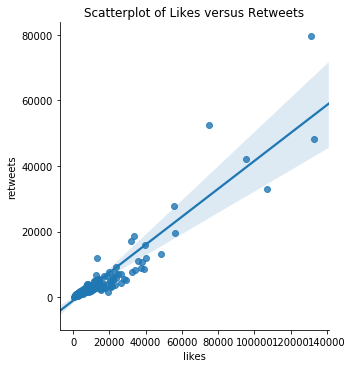

In [857]:
#scatter plot for relationship between likes and retweets
sb.lmplot(x = 'likes' ,y = 'retweets',data = merged_df)
plt.title('Scatterplot of Likes versus Retweets')

### This indicates a very strong positive correlation

Text(0.5, 1, 'First Prediction versus Second Prediction')

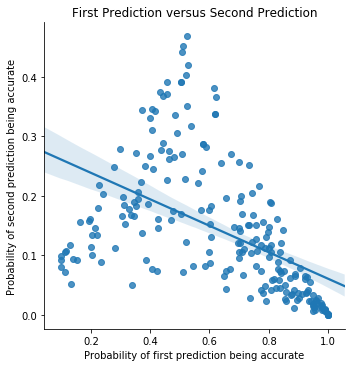

In [858]:
#scatter plot for relationship between probability of first and second predictions
sb.lmplot(x = '#1_prediction_confidence',y = '#2_prediction_confidence',data = merged_df)
plt.xlabel('Probability of first prediction being accurate')
plt.ylabel('Probability of second prediction being accurate')
plt.title('First Prediction versus Second Prediction')

### This indicates a strong negative correlation

Text(0.5, 1, 'Second Prediction versus Third Prediction')

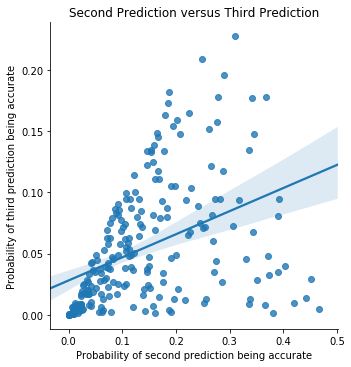

In [859]:
#scatter plot for relationship between probability of second and third predictions
sb.lmplot(x = '#2_prediction_confidence',y = '#3_prediction_confidence',data = merged_df)
plt.xlabel('Probability of second prediction being accurate')
plt.ylabel('Probability of third prediction being accurate')
plt.title('Second Prediction versus Third Prediction')

### This indicates a weak positive correlation

Text(0.5, 1, 'Number of images vs number of likes')

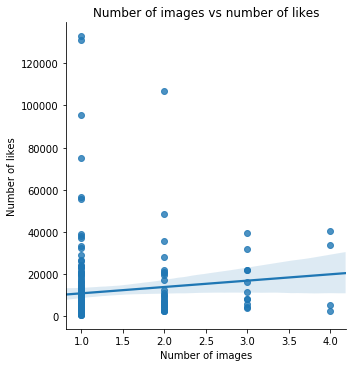

In [860]:
#scatter plot for relationship between number of images and likes
sb.lmplot(x = 'number_of_images',y = 'likes',data = merged_df)
plt.xlabel('Number of images')
plt.ylabel('Number of likes')
plt.title('Number of images vs number of likes')

### This indicates a very weak positive correlation

Text(0.5, 1, 'Number of images vs number of retweets')

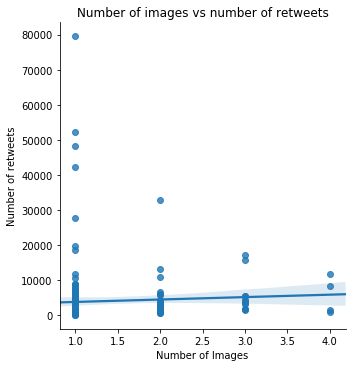

In [861]:
#scatter plot for relationship between number of images and retweets
sb.lmplot(x = 'number_of_images',y = 'retweets',data = merged_df)
plt.xlabel('Number of Images')
plt.ylabel('Number of retweets')
plt.title('Number of images vs number of retweets')

### This indicates a weak positive correlation

Text(0.5, 1, 'Rating Numerator vs Number of likes')

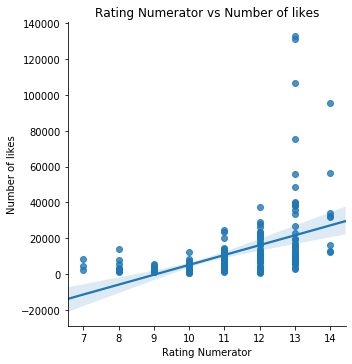

In [862]:
#scatter plot for relationship between rating_numerator and likes
sb.lmplot(x = 'rating_numerator',y = 'likes',data = merged_df)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of likes')
plt.title('Rating Numerator vs Number of likes')

### This indicates a weak positive correlation

Text(0.5, 1, 'Ratings Numerator vs Number of retweets')

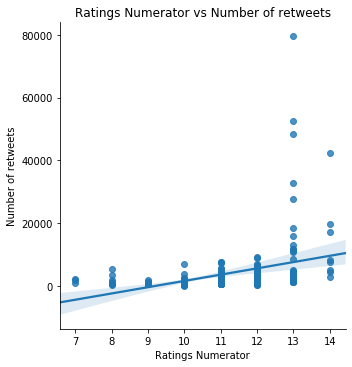

In [863]:
#scatter plot for relationship between rating_numerator and retweets
sb.lmplot(x = 'rating_numerator',y = 'retweets',data = merged_df)
plt.xlabel('Ratings Numerator')
plt.ylabel('Number of retweets')
plt.title('Ratings Numerator vs Number of retweets')

### This indicates a weak positive correlation

Text(0.5, 1.0, 'Count of Dog stage')

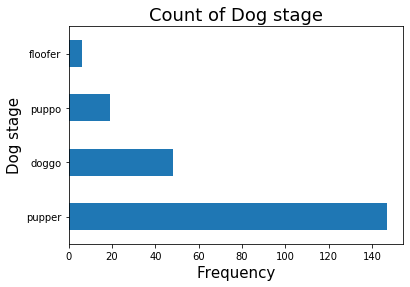

In [864]:
#Bar chart of the frequency of each dog reference name
merged_df['dog_stage'].value_counts().plot(kind = 'barh')
plt.xlabel('Frequency',fontsize = 15)
plt.ylabel('Dog stage',fontsize = 15)
plt.title("Count of Dog stage",fontsize = 18)

### This indicates that most of the dogs were puppers

Text(0.5, 1.0, 'Distribution of Likes')

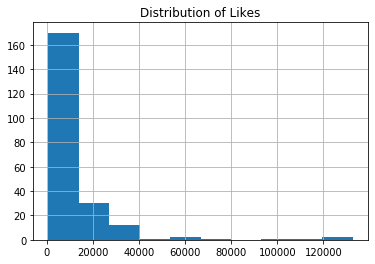

In [865]:
#histogram for distribution of likes
merged_df.hist('likes')
plt.title('Distribution of Likes')

### This indicates a right skew

Text(0.5, 1.0, 'Distribution of Retweets')

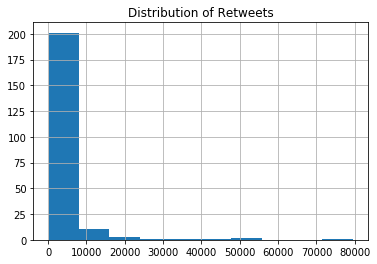

In [866]:
#histogram for distribution of retweets
merged_df.hist('retweets')
plt.title('Distribution of Retweets')

### This indicates a right skew